Supervised Learning:
  for example: Face Recognization

  New Data > Model > Predicted Output

1. Linear Regression:


  graphing a line that most probably fits to the given dataset

  Regression analysis is a technique of predictive modelling that helps you to find out the relationship between Input and the target variable.

Regression analysis is used for three types of applications:

1. Finding out the effect of Input variables on Target variable.

2. Finding out the change in Target variable with respect to one or more input variable.

3. To find out upcoming trends.

Use Cases of Linear Regression:

* Prediction of trends and Sales targets – To predict how industry is performing or how many sales targets industry may achieve in the future.

* Price Prediction – Using regression to predict the change in price of stock or product.

* Risk Management- Using regression to the analysis of Risk Management in the financial and insurance sector.

* Determining the strength of predictors

* Forecasting an effect

* Trend Forecasting


y = mx + c

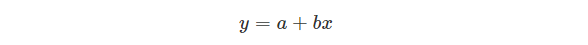

Where a and b given by the formulas: 

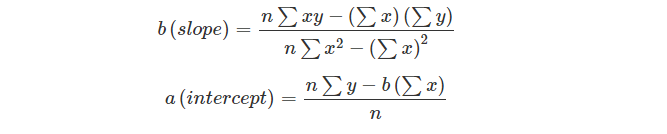

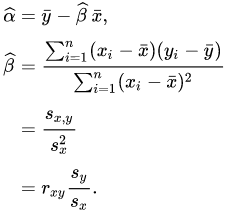

Here, x and y are two variables on the regression line.

b = Slope of the line.

a = y-intercept of the line.

x = Independent variable from dataset

y = Dependent variable from dataset

x bar & y bar is mean of x & y

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

#Reading Data
data = pd.read_csv('/content/drive/My Drive/headbrain.csv')
print(data.shape)
data.head

(237, 4)


<bound method NDFrame.head of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>

In [2]:
#collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [6]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total Number of Values
m = len(X)

#using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2

b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# print coeffecient
print(b1, b0)

0.26342933948939945 325.57342104944223


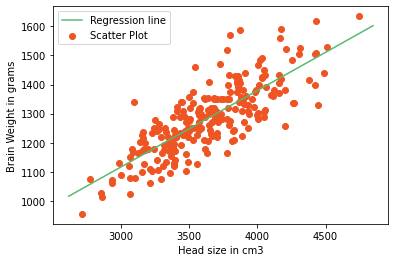

In [7]:
# plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#collecting Line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#ploting Line
plt.plot(x, y, color='#58b970', label='Regression line')

#ploting scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

Calculating R2

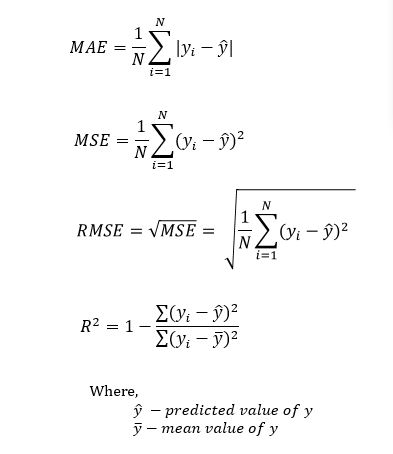

In [9]:
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2

r2 = 1- (ss_r/ss_t)
print(r2)

0.6393117199570003


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use Rank 1 matrix in scikit Learn
X = X.reshape(m, 1)

#creating model

reg = LinearRegression()

# fitting training data
reg = reg.fit(X, Y)

Y_pred = reg.predict(X)

# calculating R2 score
r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
